In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retial/retail_sales_dataset.csv


# 1. Data Loading and Cleaning: Load the retail sales dataset.

In [2]:
df = pd.read_csv('/kaggle/input/retial/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Check for missing values
df.isnull().sum() 


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## Data type coversion of date coloumn

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

# 2.Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).

In [5]:
# Get basic statistics of numerical columns
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


 # Calculating the mean mode median standard deviation

In [6]:
# Mean
mean_values = df.mean(numeric_only=True)

# Median
median_values = df.median(numeric_only=True)

# Mode
mode_values = df.mode().iloc[0]

# Standard Deviation
std_values = df.std(numeric_only=True)

# Display results
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_values)

Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object

Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


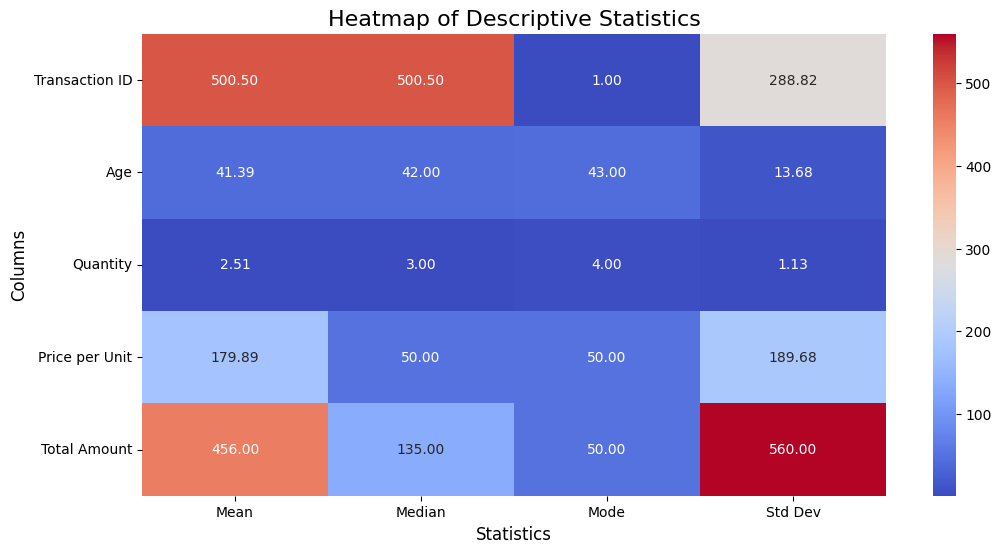

In [7]:
statistics = {
    'Mean': df.mean(numeric_only=True),
    'Median': df.median(numeric_only=True),
    'Mode': df.mode(numeric_only=True).iloc[0],  # Mode can have multiple values; take the first
    'Std Dev': df.std(numeric_only=True)
}

# Convert the statistics to a DataFrame for heatmap visualization
statistics_df = pd.DataFrame(statistics)

# Heatmap Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(statistics_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Descriptive Statistics', fontsize=16)
plt.xlabel('Statistics', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()


In [8]:
# 3. Time Series Analysis: Analyze sales trends over time using time series techniques.

In [9]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,6


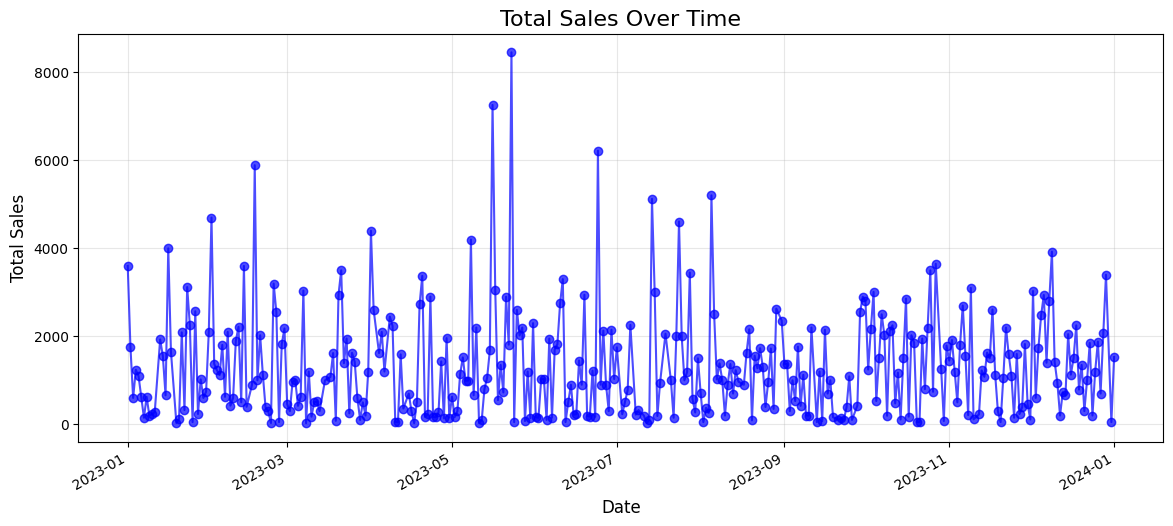

In [10]:
sales_trend = df.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(14, 6))  # Set the plot size
sales_trend.plot(color='blue', marker='o', linestyle='-', alpha=0.7)  # Plot the data
plt.title('Total Sales Over Time', fontsize=16)  # Add a title
plt.xlabel('Date', fontsize=12)  # Label the x-axis
plt.ylabel('Total Sales', fontsize=12)  # Label the y-axis
plt.grid(alpha=0.3)  # Add a grid for better readability
plt.show()  # Display the plot


# 4. Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

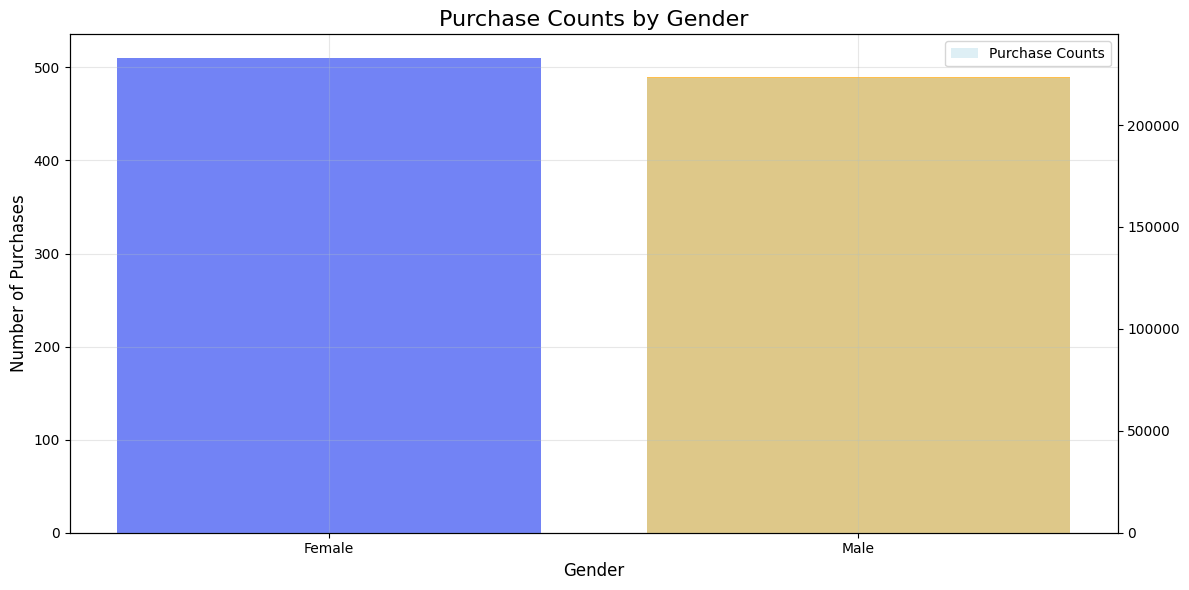

In [11]:
# Gender Analysis
gender_counts = df['Gender'].value_counts()  # Number of purchases by gender
gender_spending = df.groupby('Gender')['Total Amount'].sum()  # Total spending by gender

# Create a figure with subplots
plt.figure( figsize=(12, 6), tight_layout=False)

# Purchase Counts by Gender
plt.bar(gender_counts.index, gender_counts, color=['blue', 'orange'], alpha=0.7)
plt.title('Purchase Counts by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.grid(alpha=0.3)

# Total Spending by Gender (on secondary axis)
plt.twinx().bar(gender_spending.index, gender_spending, color='lightblue', alpha=0.4)
plt.legend(["Purchase Counts", "Total Spending"], loc="upper right")
plt.show() 


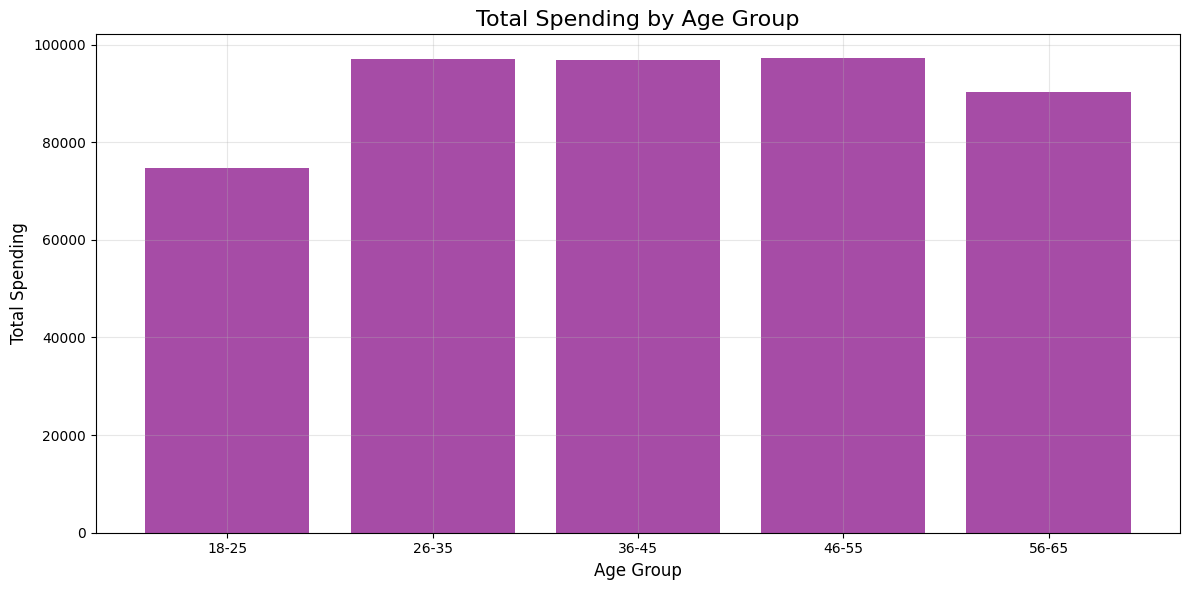

In [12]:
# Age Analysis: Create Age Groups and Analyze Spending
bins = [18, 25, 35, 45, 55, 65]  # Age group bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_spending = df.groupby('Age Group', observed=False)['Total Amount'].sum()

# Create a figure with subplots
fig, axes = plt.subplots(figsize=(12, 6), tight_layout=False)
                         


                         
# Spending by Age Group
plt.bar(age_group_spending.index, age_group_spending, color='purple', alpha=0.7)
plt.title('Total Spending by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.grid(alpha=0.3)
plt.show() 

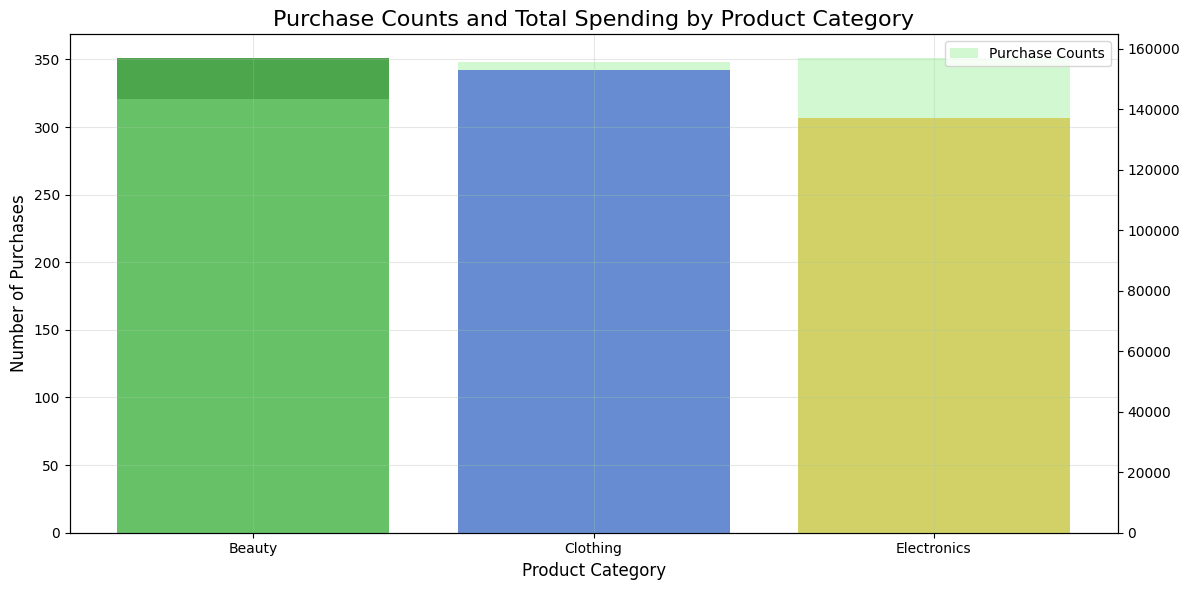

In [13]:
# Product Category Analysis
product_counts = df['Product Category'].value_counts()  # Number of purchases per product category
product_spending = df.groupby('Product Category')['Total Amount'].sum()  # Total spending per product category

# Create a figure with subplots
fig, axes = plt.subplots(figsize=(12, 6), tight_layout=False)

# Purchase Counts by Product Category
plt.bar(product_counts.index, product_counts, color=['green', 'blue', 'orange'], alpha=0.7, label='Purchase Counts')
plt.title('Purchase Counts and Total Spending by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.grid(alpha=0.3)

# Total Spending by Product Category (on secondary axis)
plt.twinx().bar(product_spending.index, product_spending, color='lightgreen', alpha=0.4)
plt.legend(["Purchase Counts", "Total Spending"], loc="upper right")
plt.show() 